# Mount GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Buka direktori dataset di gdrive

In [ ]:
import os
os.chdir('/content/drive/MyDrive/RAS KUCING DATASET')

# Prepocessing

In [ ]:
#cek label
from pathlib import Path
image_dir = Path('/content/drive/MyDrive/RAS KUCING DATASET/image_dir')


In [ ]:
#Get filepaths and labels
filepaths_ = list(image_dir.glob(r'**/*.jpg'))
labels_ = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_))

print(labels_)

['Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay', 'Bombay',

In [ ]:
import pandas as pd
# uji
filepaths2 = pd.Series(filepaths_, name='Filepath').astype(str)
labels2 = pd.Series(labels_, name='Label')
# Concatenate filepaths_uji and labels_uji
image_df = pd.concat([filepaths2, labels2], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(9)

Filepath    Label
0  /content/drive/MyDrive/RAS KUCING DATASET/imag...   Birman
1  /content/drive/MyDrive/RAS KUCING DATASET/imag...  Persian
2  /content/drive/MyDrive/RAS KUCING DATASET/imag...   Bombay
3  /content/drive/MyDrive/RAS KUCING DATASET/imag...   Bombay
4  /content/drive/MyDrive/RAS KUCING DATASET/imag...   Bengal
5  /content/drive/MyDrive/RAS KUCING DATASET/imag...  Persian
6  /content/drive/MyDrive/RAS KUCING DATASET/imag...   Birman
7  /content/drive/MyDrive/RAS KUCING DATASET/imag...   Bombay
8  /content/drive/MyDrive/RAS KUCING DATASET/imag...  Persian

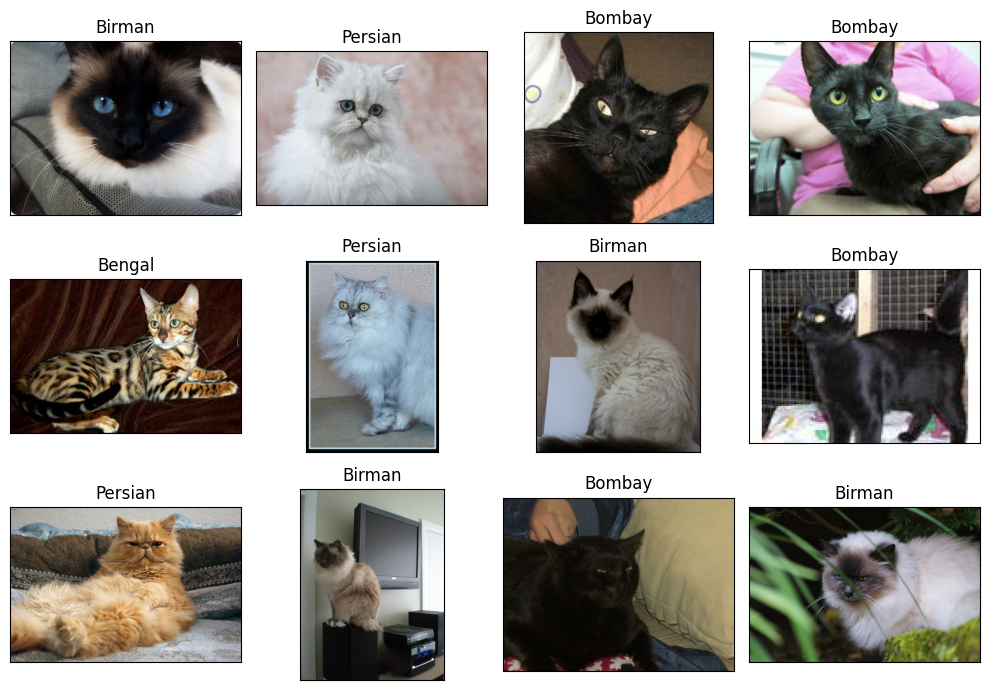

In [ ]:
# Display some pictures of the dataset with their labels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

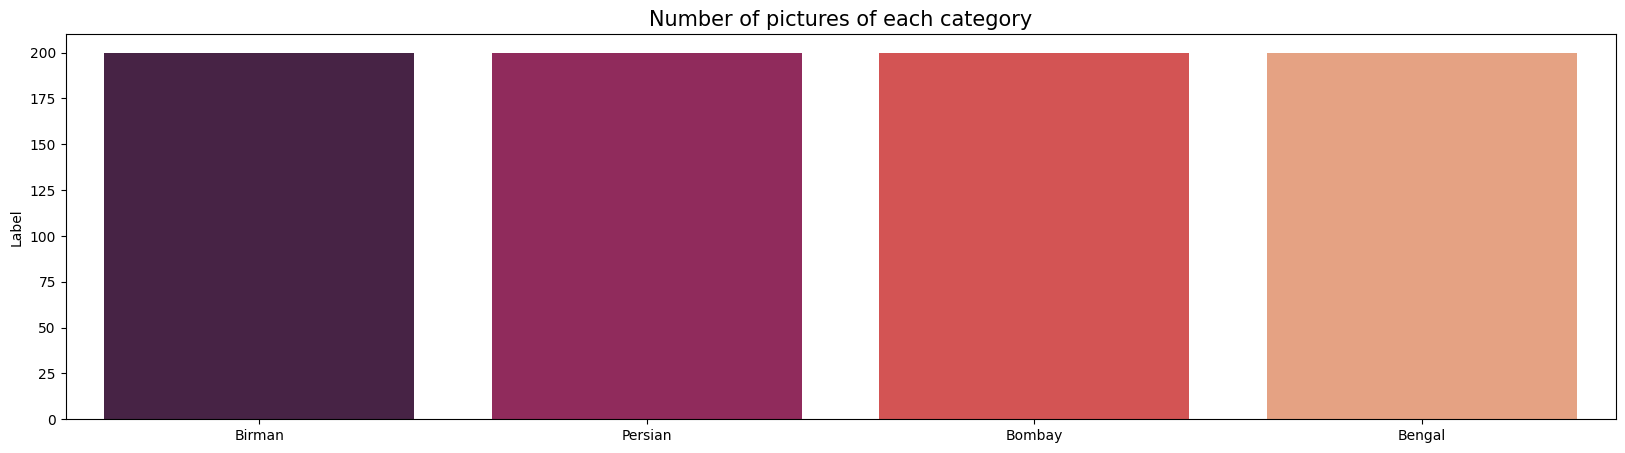

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate in train, validation, and test data
train_ratio = 0.85
validation_ratio = 0.10
test_ratio = 0.05

# Split train_df into train and temp sets
train_df, temp_df = train_test_split(image_df, train_size=train_ratio, shuffle=True, random_state=1)

# Split temp_df into validation and test sets
validation_df, test_df = train_test_split(temp_df, train_size=validation_ratio / (validation_ratio + test_ratio), shuffle=True, random_state=1)

# Print the sizes of resulting subsets
print("Train set size:", len(train_df))
print("Validation set size:", len(validation_df))
print("Test set size:", len(test_df))


Train set size: 680
Validation set size: 80
Test set size: 40


In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

validasi_data = val_datagen.flow_from_dataframe(dataframe=validation_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=16,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

test_data = test_datagen.flow_from_dataframe(dataframe=test_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

Found 680 validated image filenames belonging to 4 classes.
Found 80 validated image filenames belonging to 4 classes.
Found 40 validated image filenames belonging to 4 classes.


# Built Inception

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    # Note the input shape is the desired size of the image 224x224 with 3 bytes color
    # This is the first convolution
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    # The second convolution
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # The third convolution
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # The fourth convolution
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # The fourth convolution
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # The fourth convolution
    Conv2D(1024, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    Flatten(),
    # 512 neuron hidden layer with Dropout and Batch Normalization
    BatchNormalization(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2),
    # Output layer with 5 neurons for 5 classes and softmax activation
    Dense(4, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/PERCOBAAN/cnn_experiment4_augmentasi.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_accuracy',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='max',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
from tensorflow.keras.optimizers import Adam
# Set the training parameters
callbacks= myCallback()
model.compile(optimizer = Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history_cnn = model.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/16,
                  validation_steps=validasi_data.n/16,
                  epochs=120, callbacks=([callbacks],[checkpoint_callback]))

Epoch 1/120
43/42 [==============================] - ETA: 0s - loss: 7.5810 - accuracy: 0.4338
Epoch 1: val_accuracy improved from -inf to 0.52500, saving model to /content/drive/MyDrive/PERCOBAAN/cnn_experiment4_augmentasi.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 16s 388ms/step - loss: 7.5810 - accuracy: 0.4338 - val_loss: 7.2463 - val_accuracy: 0.5250
Epoch 2/120
43/42 [==============================] - ETA: 0s - loss: 6.5487 - accuracy: 0.5912
Epoch 2: val_accuracy did not improve from 0.52500
42/42 [==============================] - 15s 356ms/step - loss: 6.5487 - accuracy: 0.5912 - val_loss: 6.5440 - val_accuracy: 0.4125
Epoch 3/120
43/42 [==============================] - ETA: 0s - loss: 5.8680 - accuracy: 0.6132
Epoch 3: val_accuracy improved from 0.52500 to 0.62500, saving model to /content/drive/MyDrive/PERCOBAAN/cnn_experiment4_augmentasi.h5
42/42 [==============================] - 17s 401ms/step - loss: 5.8680 - accuracy: 0.6132 - val_loss: 5.8989 - val_accuracy: 0.6250
Epoch 4/120
43/42 [==============================] - ETA: 0s - loss: 5.2663 - accuracy: 0.6559
Epoch 4: val_accuracy did not improve from 0.62500
42/42 [==============================] - 16s 365ms/step - loss: 5.2663 - accuracy:

# Saved Model to .h5

In [ ]:
MODEL_BASE_PATH = "/content/drive/MyDrive/PERCOBAAN"
PROJECT_NAME = "HASIL"
SAVE_MODEL_NAME = "cnn_model5_fixx.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/PERCOBAAN/HASIL/cnn_model5_fixx.h5...


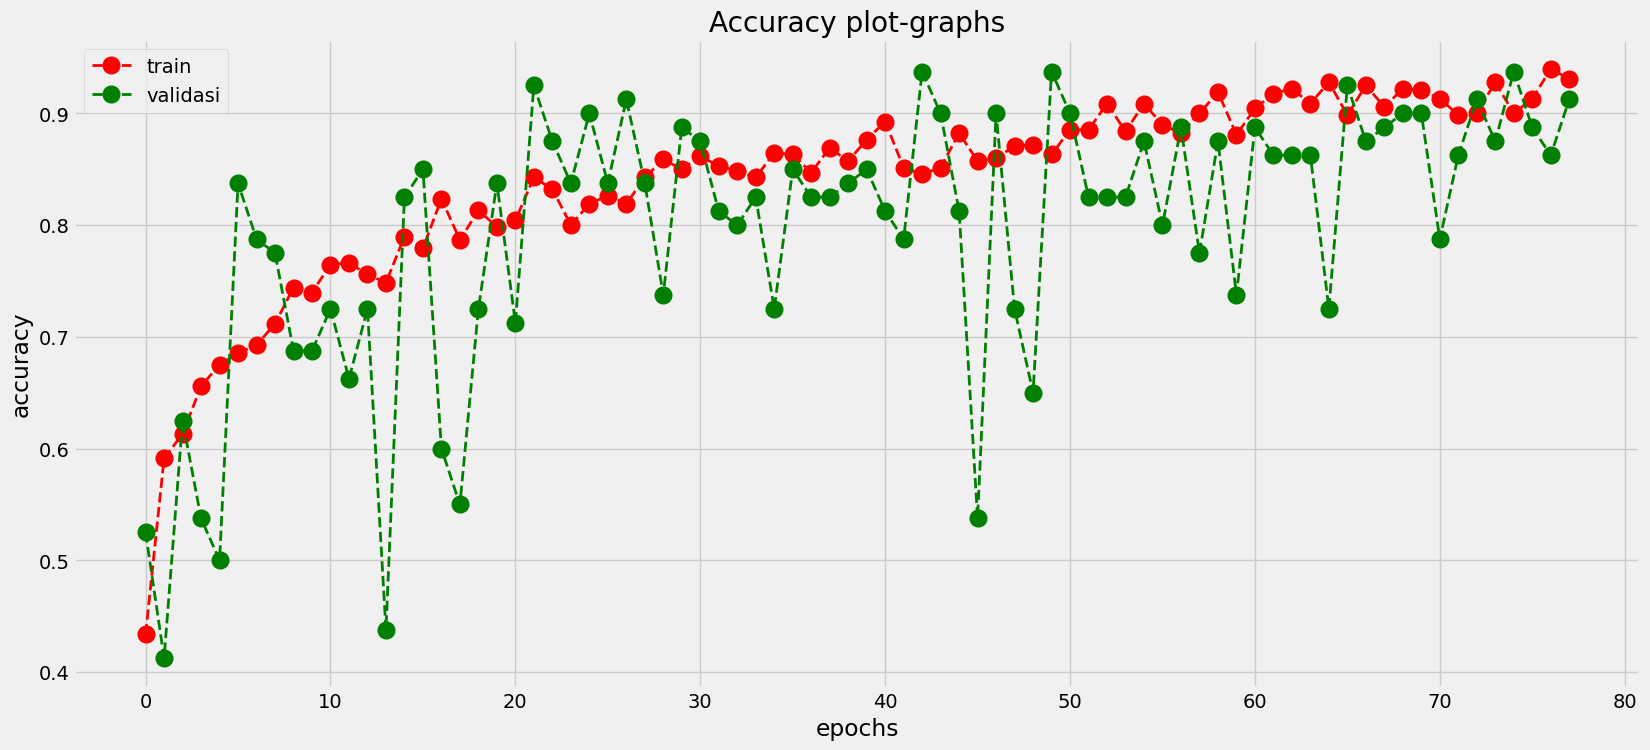

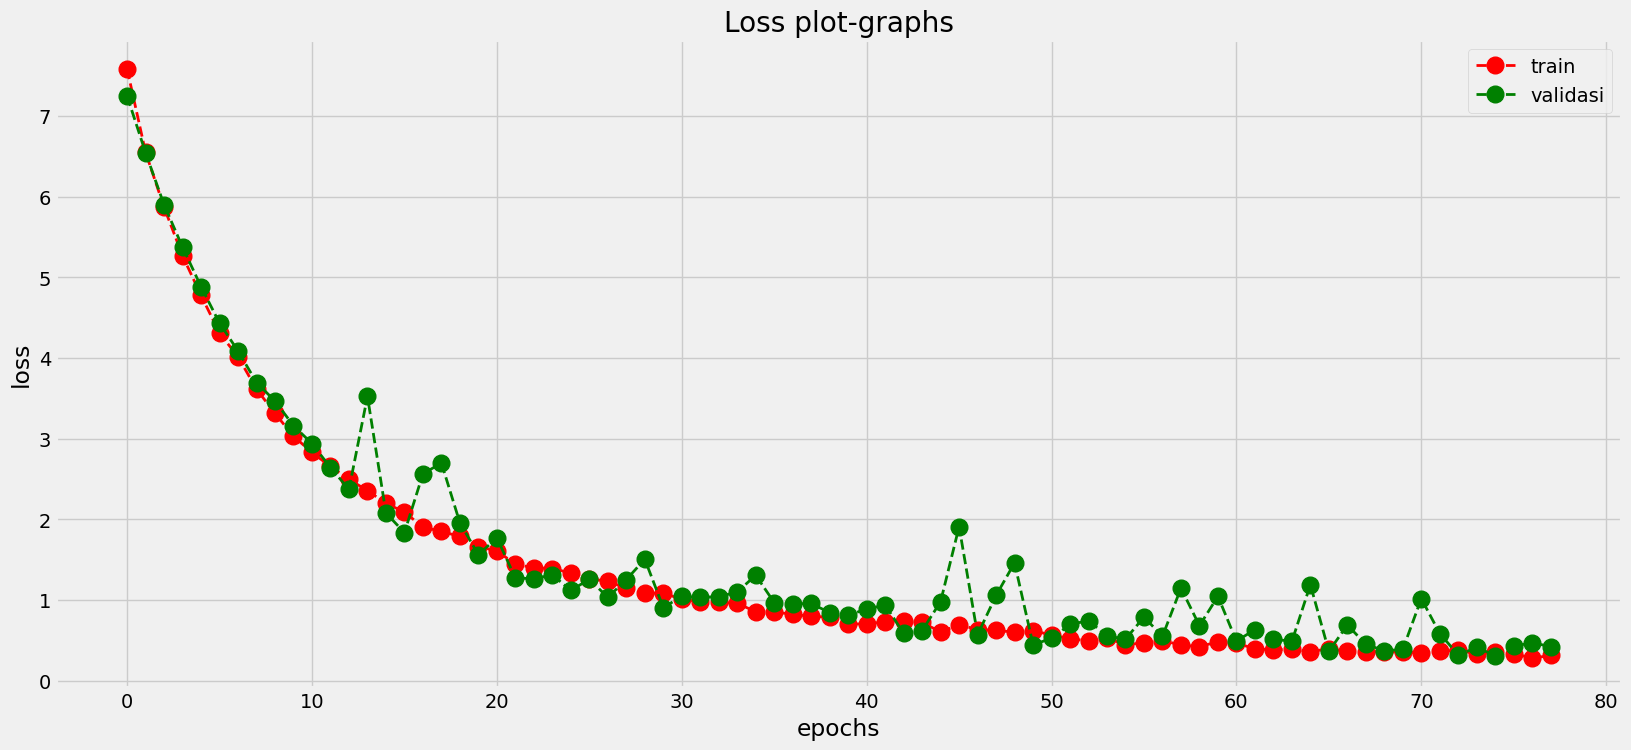

In [ ]:
#Accuracy and Loss plot-graphs

with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18,8))
    plt.plot(history_cnn.history['accuracy'],color="red",marker="o",linestyle='dashed',linewidth=2, markersize=12)
    plt.plot(history_cnn.history['val_accuracy'],color="green",marker="o",linestyle='dashed',linewidth=2, markersize=12)
    plt.title('Accuracy plot-graphs')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['train', 'validasi'], loc='upper left')
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history_cnn.history['loss'],color="red",marker="o",linestyle='dashed',linewidth=2, markersize=12)
    plt.plot(history_cnn.history['val_loss'],color="green",marker="o",linestyle='dashed',linewidth=2, markersize=12)
    plt.title('Loss plot-graphs')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['train', 'validasi'], loc='upper right')
    plt.show()

In [ ]:
# Predict the label of the test_images
import numpy as np
predict_test = model.predict(test_data)
predict_test = np.argmax(predict_test,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
predict_test = [labels[k] for k in predict_validation]

# Display the result
print(f'The first 5 predictions: {predict_test[:4]}')

5/5 [==============================] - 1s 85ms/step
The first 5 predictions: ['Bengal', 'Bengal', 'Bombay', 'Birman']


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(test_df.Label)
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

      Bengal       0.94      0.83      0.88        18
      Birman       0.85      0.94      0.89        18
      Bombay       1.00      0.96      0.98        25
     Persian       0.85      0.89      0.87        19

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.92      0.91      0.91        80



# Plotting Accuration After Training and Test Model

In [ ]:
LABELS = ['Bengal', 'Birman', 'Bombay' , 'Persian']

In [ ]:
# Predict the label of the test_images
import numpy as np
predict_validation = model.predict(validasi_data)
predict_validation = np.argmax(predict_validation,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
predict_validation = [labels[k] for k in predict_validation]

# Display the result
print(f'The first 5 predictions: {predict_validation[:4]}')

5/5 [==============================] - 0s 78ms/step
The first 5 predictions: ['Bengal', 'Bengal', 'Bombay', 'Birman']


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(validation_df.Label)
print(classification_report(y_test, predict_validation))

              precision    recall  f1-score   support

      Bengal       0.94      0.83      0.88        18
      Birman       0.85      0.94      0.89        18
      Bombay       1.00      0.96      0.98        25
     Persian       0.85      0.89      0.87        19

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.92      0.91      0.91        80



In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(predict_validation,y_test)


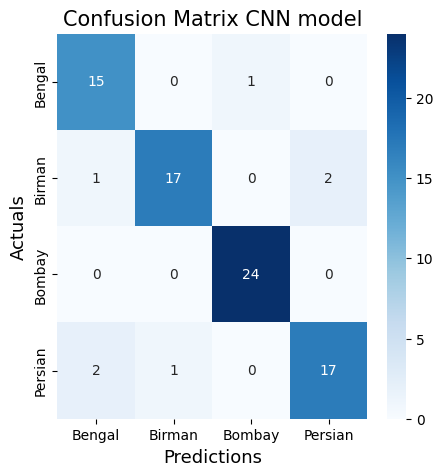

In [ ]:
'''The general purpose of confusion matrix is to display correctly predicted counts and incorrectly
predicted counts in each classes.
'''
plt.figure(figsize=(5,5))
plt.rcParams['font.size']=10
sns.heatmap(cm,
            cmap='Blues',
            annot=True,
            fmt='d',
            xticklabels=LABELS,
            yticklabels=LABELS,
            linecolor='black',)
plt.title('Confusion Matrix CNN model', fontsize=15)
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Actuals', fontsize=13)
plt.show()



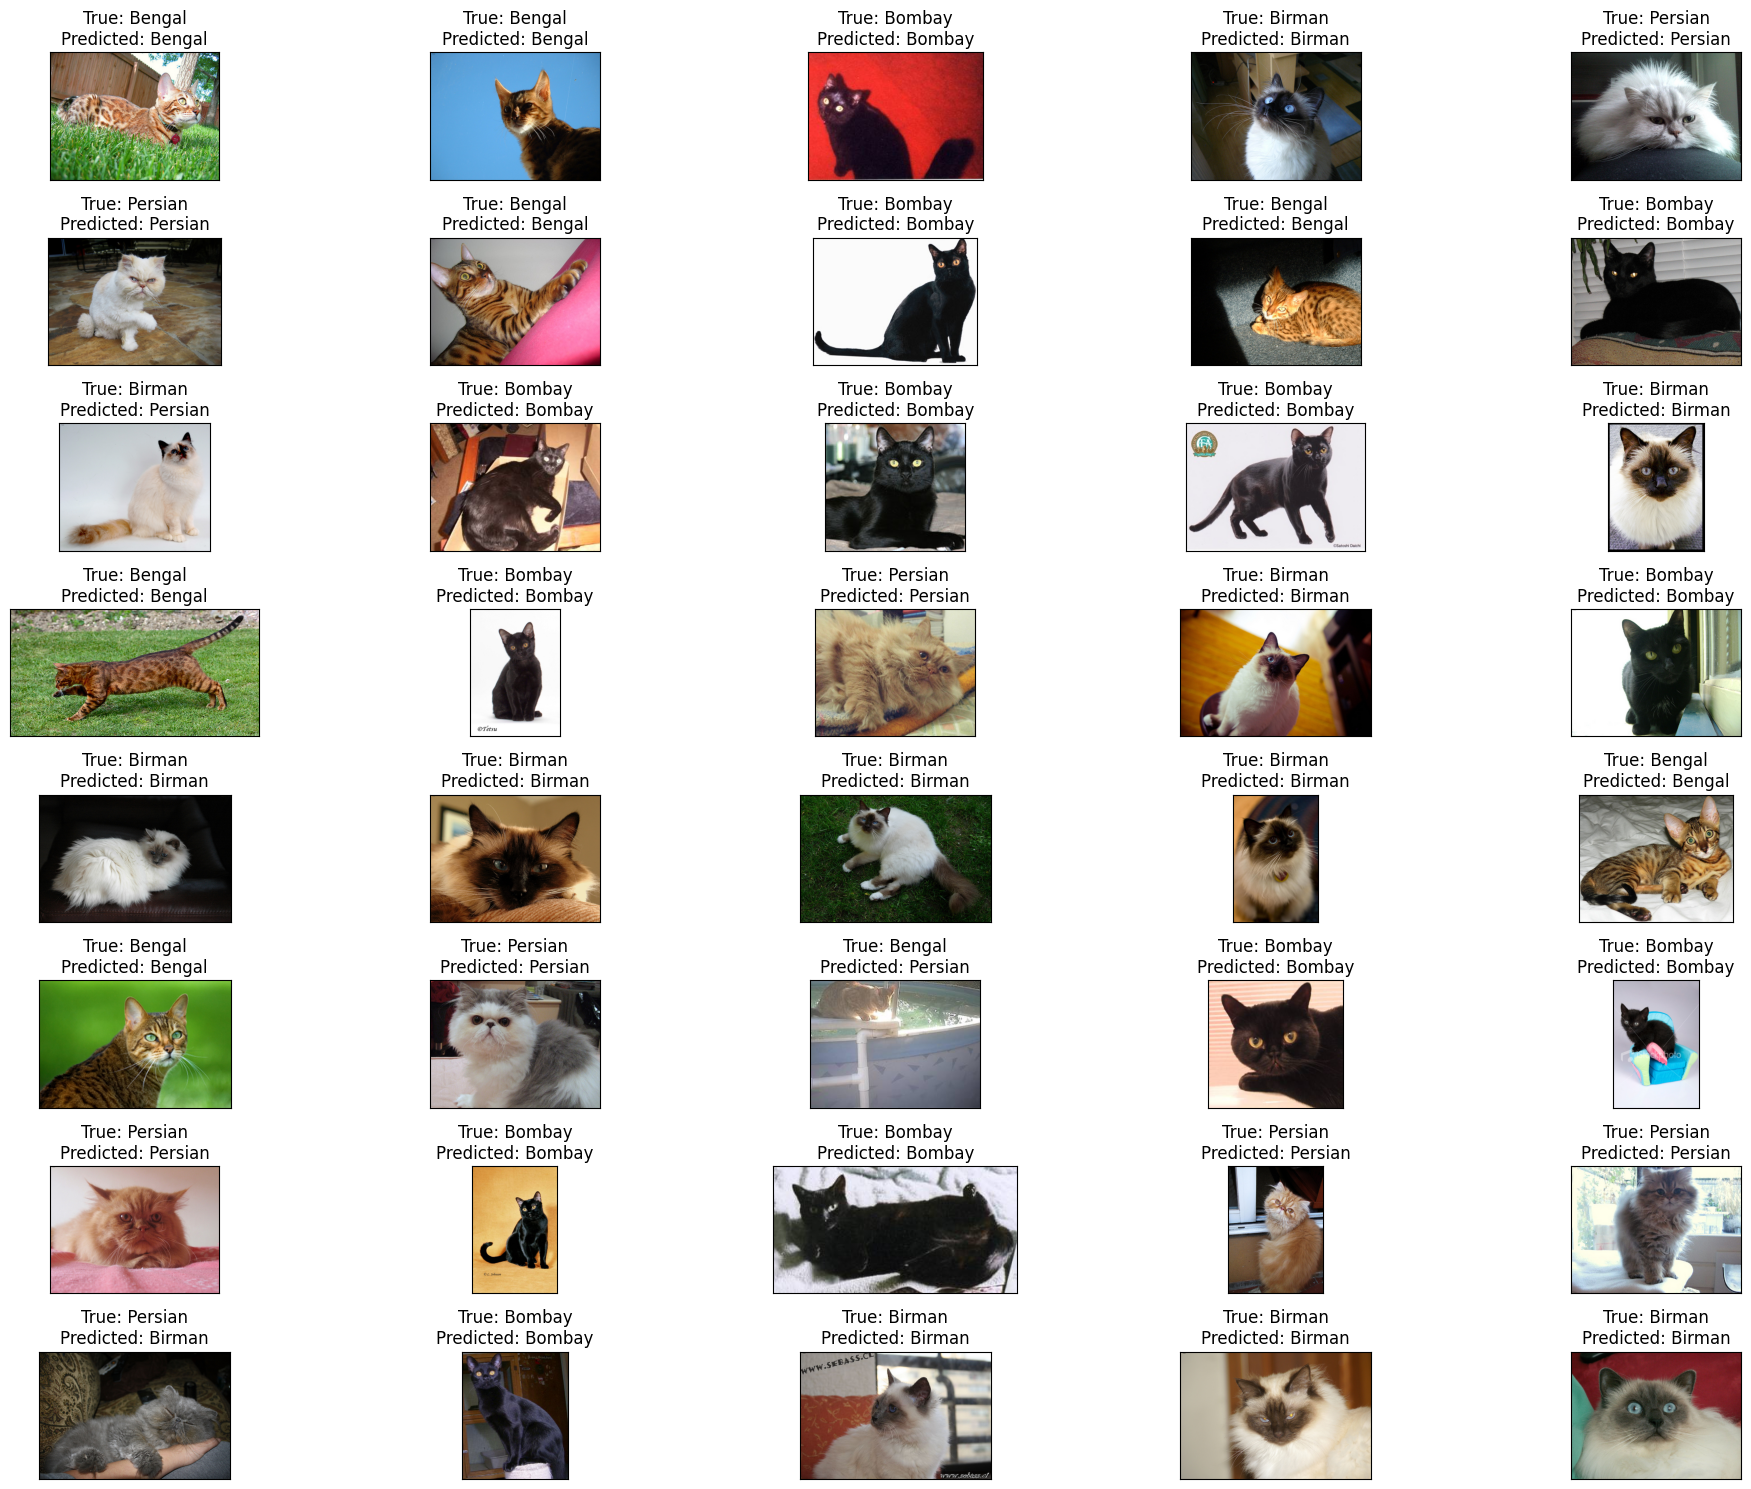

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validation_df.Filepath.iloc[i]))
    ax.set_title(f"True: {validation_df.Label.iloc[i]}\nPredicted: {predict_validation[i]}")
plt.tight_layout()
plt.show()

In [ ]:
# Predict the label of the test_images
import numpy as np
pred = model.predict(test_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (test_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:4]}')

2/2 [==============================] - 1s 10ms/step
The first 5 predictions: ['Bombay', 'Bombay', 'Persian', 'Birman']


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Bengal       1.00      0.67      0.80        12
      Birman       0.80      0.89      0.84         9
      Bombay       0.92      0.92      0.92        12
     Persian       0.60      0.86      0.71         7

    accuracy                           0.82        40
   macro avg       0.83      0.83      0.82        40
weighted avg       0.86      0.82      0.83        40



In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)


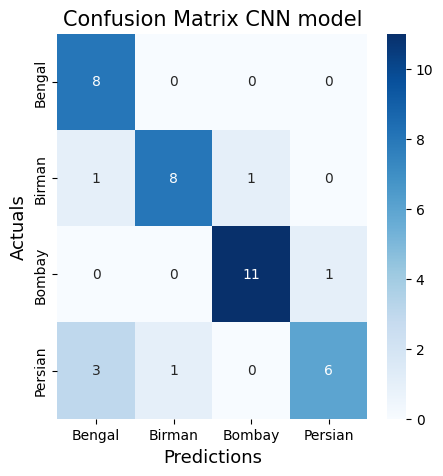

In [ ]:
'''The general purpose of confusion matrix is to display correctly predicted counts and incorrectly
predicted counts in each classes.
'''
plt.figure(figsize=(5,5))
plt.rcParams['font.size']=10
sns.heatmap(cm,
            cmap='Blues',
            annot=True,
            fmt='d',
            xticklabels=LABELS,
            yticklabels=LABELS,
            linecolor='black',)
plt.title('Confusion Matrix CNN model', fontsize=15)
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Actuals', fontsize=13)
plt.show()



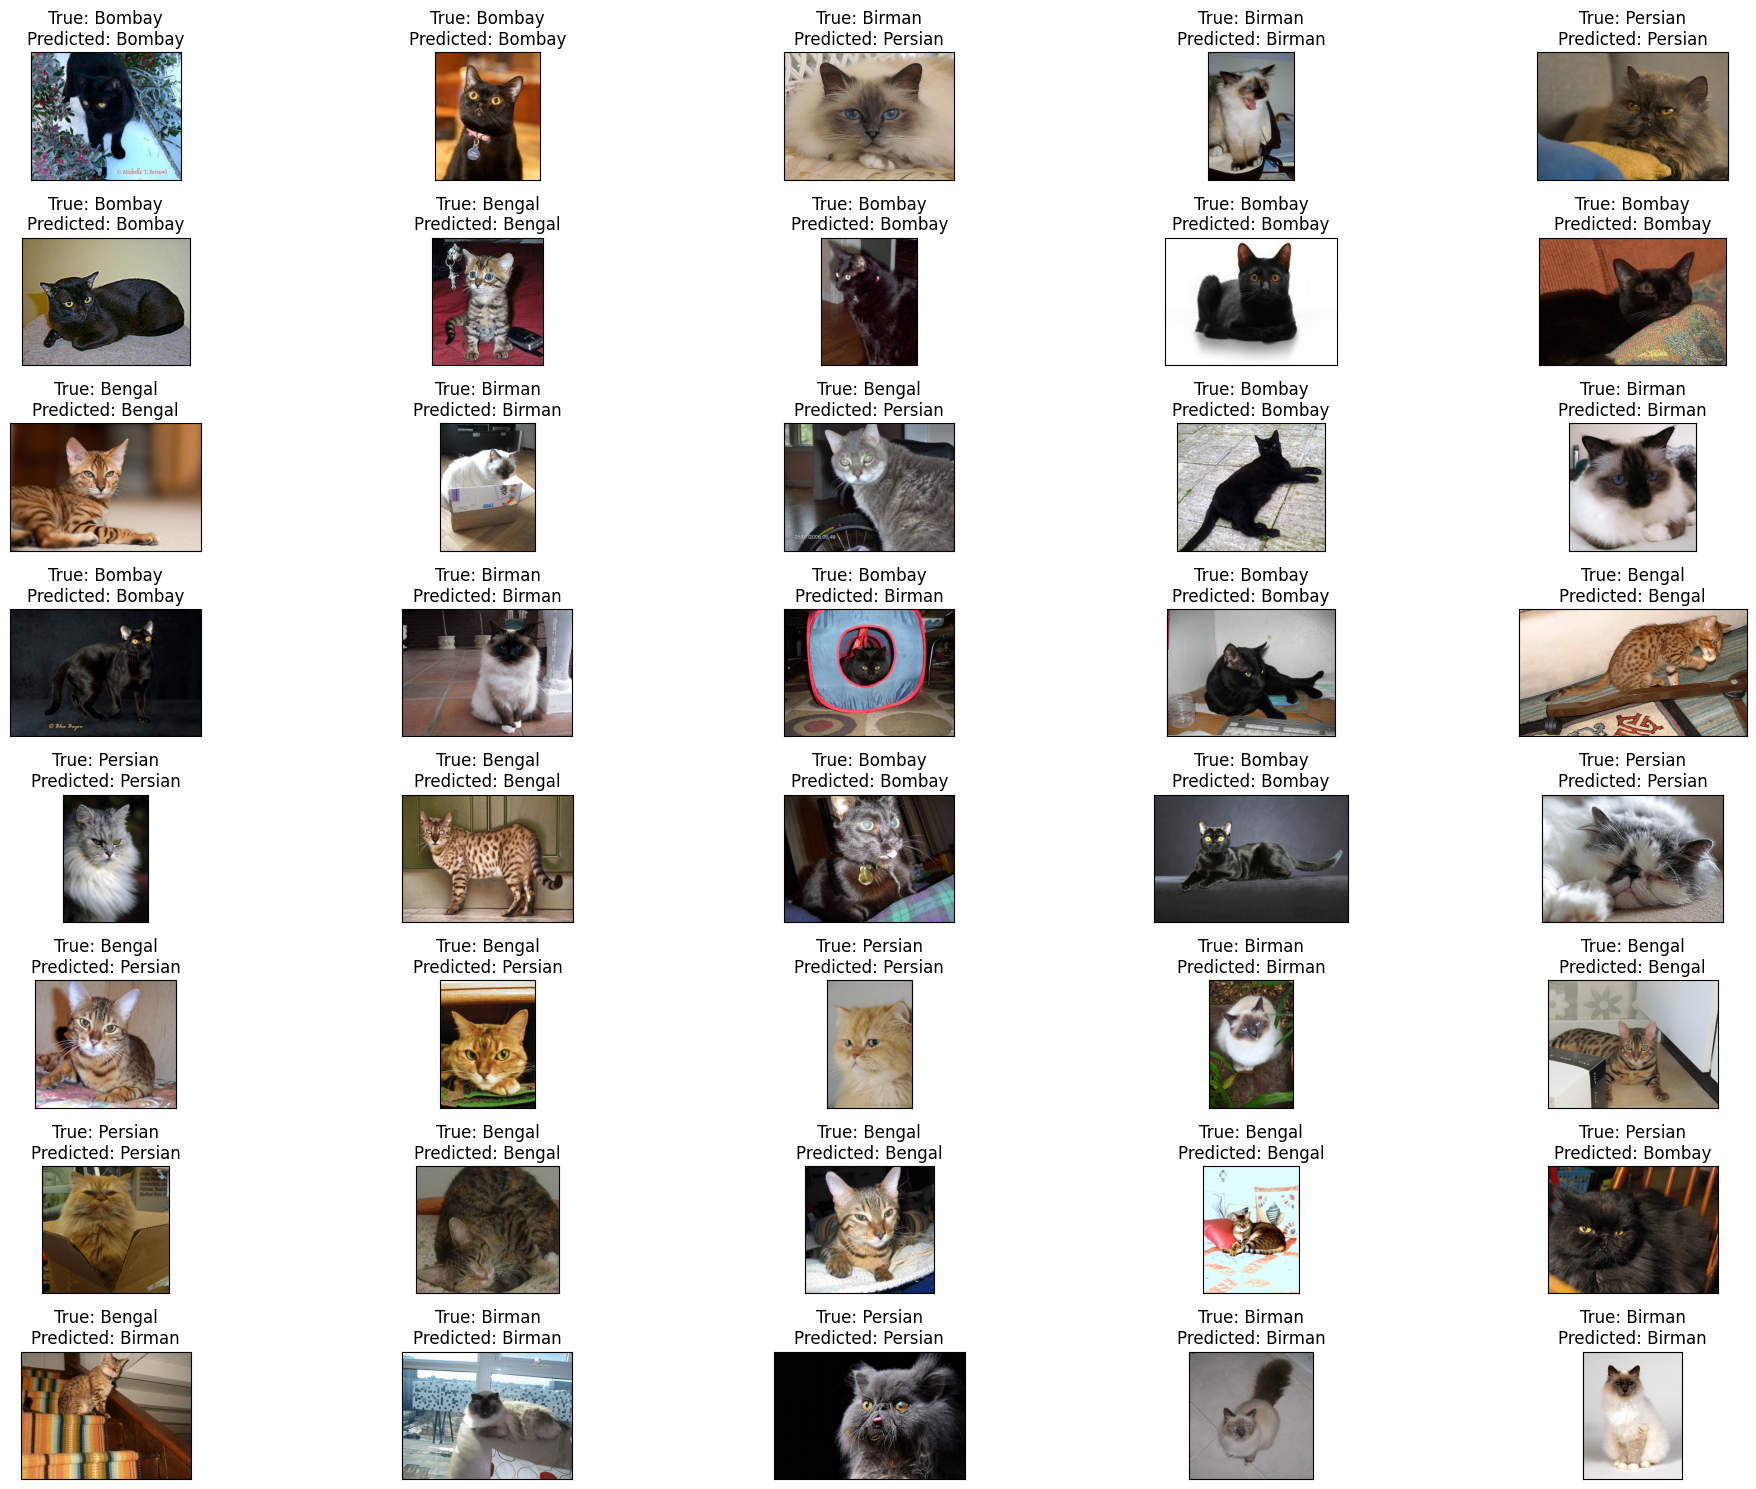

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
import os
os.chdir('/content')

Saving persian.jpg to persian.jpg
1/1 [==============================] - 0s 481ms/step
Predicted class: Persian
Probability: 96.03591 %
[ 1.8213944  1.354076   0.7886258 96.03591  ]


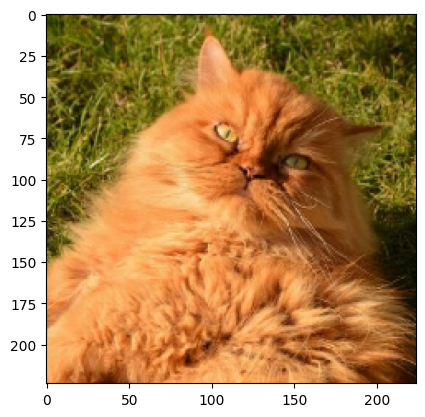

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image you want to make predictions on
uploaded = files.upload()

for fn in uploaded.keys():
  img_path = fn

# img_path = '/content/drive/MyDrive/BANGKIT 2023/test data/blck.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size to match your model's expected input shape
img_array = image.img_to_array(img)
img_array /= 255
img_array = np.expand_dims(img_array, axis=0)

# images = np.vstack([img_array])
# classes = model.predict(images, batch_size=10)

# Make the prediction
predictions = model.predict(img_array)

# Mengalikan prediksi dengan 100 untuk mendapatkan nilai dalam bentuk persen
predicted_probabilities = predictions[0] * 100

# Find the class with the highest predicted probability
predicted_class = np.argmax(predicted_probabilities)

# Print the predicted class and its probability in percent
class_names = ['Bengal', 'Birman', 'Bombay', 'Persian']
print('Predicted class:', class_names[predicted_class])
print('Probability:', predicted_probabilities[predicted_class], '%')

print(predicted_probabilities)
# Show the image
plt.imshow(img)
plt.show()



Saving birman.jpg to birman.jpg
1/1 [==============================] - 0s 35ms/step
Predicted class: Birman
Probability: 74.77206 %
[ 0.9157053 74.77206    0.2504431 24.061789 ]


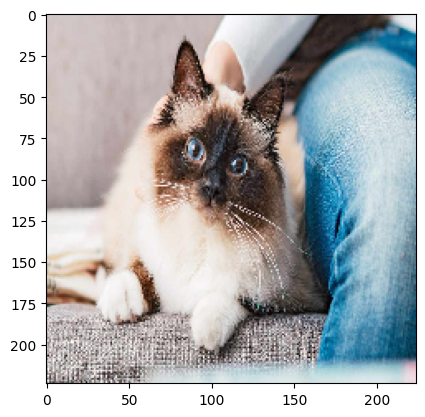

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image you want to make predictions on
uploaded = files.upload()

for fn in uploaded.keys():
  img_path = fn

# img_path = '/content/drive/MyDrive/BANGKIT 2023/test data/blck.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size to match your model's expected input shape
img_array = image.img_to_array(img)
img_array /= 255
img_array = np.expand_dims(img_array, axis=0)

# images = np.vstack([img_array])
# classes = model.predict(images, batch_size=10)

# Make the prediction
predictions = model.predict(img_array)

# Mengalikan prediksi dengan 100 untuk mendapatkan nilai dalam bentuk persen
predicted_probabilities = predictions[0] * 100

# Find the class with the highest predicted probability
predicted_class = np.argmax(predicted_probabilities)

# Print the predicted class and its probability in percent
class_names = ['Bengal', 'Birman', 'Bombay', 'Persian']
print('Predicted class:', class_names[predicted_class])
print('Probability:', predicted_probabilities[predicted_class], '%')

print(predicted_probabilities)
# Show the image
plt.imshow(img)
plt.show()



Saving bengal.jpg to bengal.jpg
1/1 [==============================] - 0s 19ms/step
Predicted class: Bengal
Probability: 99.29537 %
[9.9295372e+01 2.5013477e-01 8.6961634e-02 3.6753443e-01]


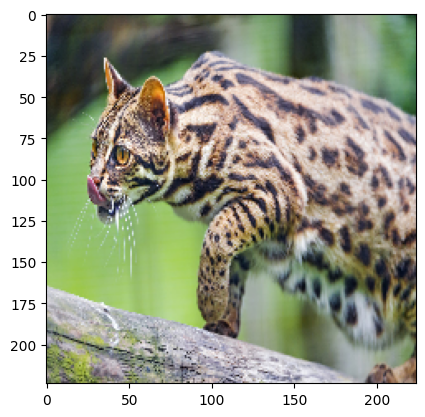

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image you want to make predictions on
uploaded = files.upload()

for fn in uploaded.keys():
  img_path = fn

# img_path = '/content/drive/MyDrive/BANGKIT 2023/test data/blck.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size to match your model's expected input shape
img_array = image.img_to_array(img)
img_array /= 255
img_array = np.expand_dims(img_array, axis=0)

# images = np.vstack([img_array])
# classes = model.predict(images, batch_size=10)

# Make the prediction
predictions = model.predict(img_array)

# Mengalikan prediksi dengan 100 untuk mendapatkan nilai dalam bentuk persen
predicted_probabilities = predictions[0] * 100

# Find the class with the highest predicted probability
predicted_class = np.argmax(predicted_probabilities)

# Print the predicted class and its probability in percent
class_names = ['Bengal', 'Birman', 'Bombay', 'Persian']
print('Predicted class:', class_names[predicted_class])
print('Probability:', predicted_probabilities[predicted_class], '%')

print(predicted_probabilities)
# Show the image
plt.imshow(img)
plt.show()



Saving download.jfif to download.jfif
1/1 [==============================] - 0s 23ms/step
Predicted class: Bombay
[[5.4586353e-04 2.5978056e-04 9.8387235e-01 1.5322041e-02]]


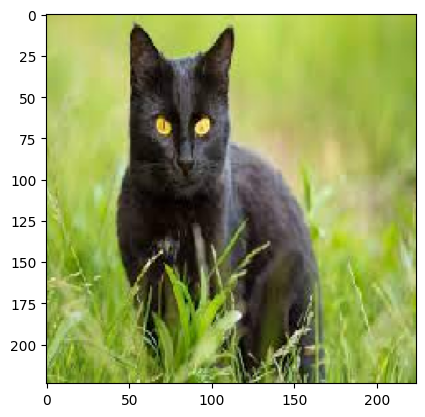

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image you want to make predictions on
uploaded = files.upload()

for fn in uploaded.keys():
  img_path = fn

# img_path = '/content/drive/MyDrive/BANGKIT 2023/test data/blck.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size to match your model's expected input shape
img_array = image.img_to_array(img)
img_array /= 255
img_array = np.expand_dims(img_array, axis=0)

# images = np.vstack([img_array])
# classes = model.predict(images, batch_size=10)
# Make the prediction
predictions = model.predict(img_array)

# Find the class with the highest predicted probability
predicted_class = np.argmax(predictions[0])

# Print the predicted class
class_names = ['Bengal', 'Birman', 'Bombay', 'Persian']
print('Predicted class:', class_names[predicted_class])

print(predictions)
# Show the image
plt.imshow(img)
plt.show()

Saving persian2.png to persian2.png
1/1 [==============================] - 0s 19ms/step
Predicted class: Persian
Probability: 98.840096 %
[8.43368992e-02 9.54337597e-01 1.21232055e-01 9.88400955e+01]


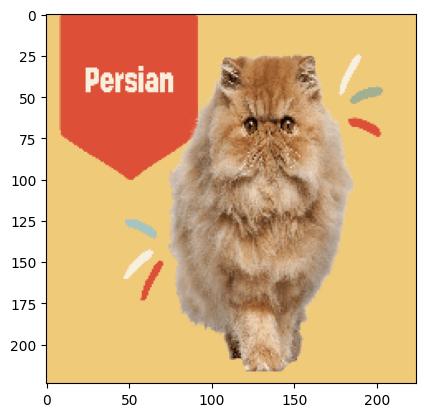

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image you want to make predictions on
uploaded = files.upload()

for fn in uploaded.keys():
  img_path = fn

# img_path = '/content/drive/MyDrive/BANGKIT 2023/test data/blck.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size to match your model's expected input shape
img_array = image.img_to_array(img)
img_array /= 255
img_array = np.expand_dims(img_array, axis=0)

# images = np.vstack([img_array])
# classes = model.predict(images, batch_size=10)

# Make the prediction
predictions = model.predict(img_array)

# Mengalikan prediksi dengan 100 untuk mendapatkan nilai dalam bentuk persen
predicted_probabilities = predictions[0] * 100

# Find the class with the highest predicted probability
predicted_class = np.argmax(predicted_probabilities)

# Print the predicted class and its probability in percent
class_names = ['Bengal', 'Birman', 'Bombay', 'Persian']
print('Predicted class:', class_names[predicted_class])
print('Probability:', predicted_probabilities[predicted_class], '%')

print(predicted_probabilities)
# Show the image
plt.imshow(img)
plt.show()



Saving silver-bengal-cat.webp to silver-bengal-cat.webp
1/1 [==============================] - 0s 21ms/step
Predicted class: Bengal
Probability: 93.982956 %
[93.982956    2.9500153   0.68235046  2.3846667 ]


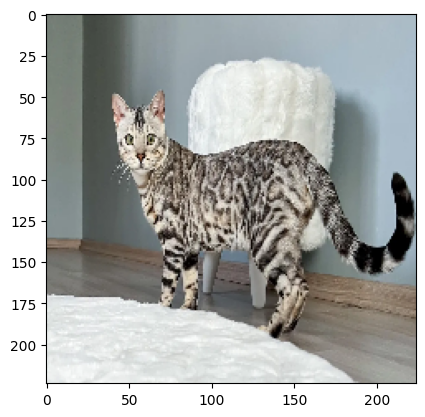

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image you want to make predictions on
uploaded = files.upload()

for fn in uploaded.keys():
  img_path = fn

# img_path = '/content/drive/MyDrive/BANGKIT 2023/test data/blck.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size to match your model's expected input shape
img_array = image.img_to_array(img)
img_array /= 255
img_array = np.expand_dims(img_array, axis=0)

# images = np.vstack([img_array])
# classes = model.predict(images, batch_size=10)

# Make the prediction
predictions = model.predict(img_array)

# Mengalikan prediksi dengan 100 untuk mendapatkan nilai dalam bentuk persen
predicted_probabilities = predictions[0] * 100

# Find the class with the highest predicted probability
predicted_class = np.argmax(predicted_probabilities)

# Print the predicted class and its probability in percent
class_names = ['Bengal', 'Birman', 'Bombay', 'Persian']
print('Predicted class:', class_names[predicted_class])
print('Probability:', predicted_probabilities[predicted_class], '%')

print(predicted_probabilities)
# Show the image
plt.imshow(img)
plt.show()

